In [18]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import skimage
import SimpleITK as sitk

image_viewer = sitk.ImageViewer() 


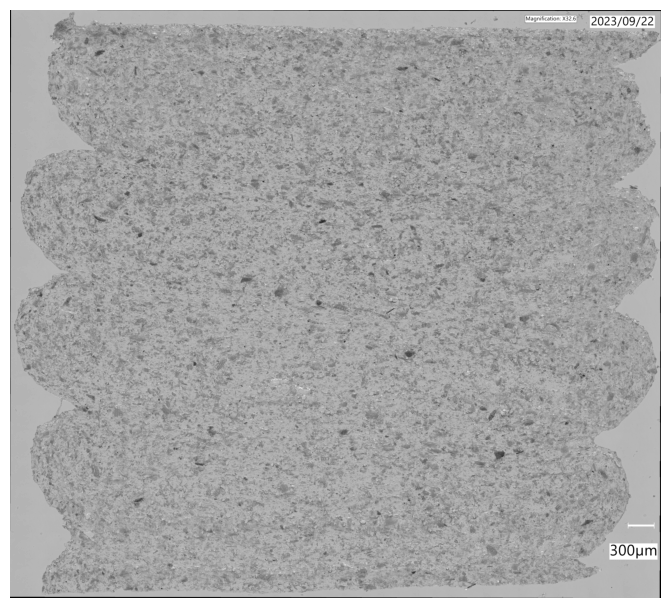

In [20]:
relative_path_1 = "data/04_060__150_00_01_00C_230922_2D.tif"
relative_path_2 = "data/04_060_150_01_01_005_230920_3D.tif"
relative_path_3 = "data/04_060_150_01_04_008_230920_3D.tif"

img_color = utils.read_image(relative_path_1)
img_gray = utils.rgb_to_gray(img_color)

utils.print_image(img_gray)

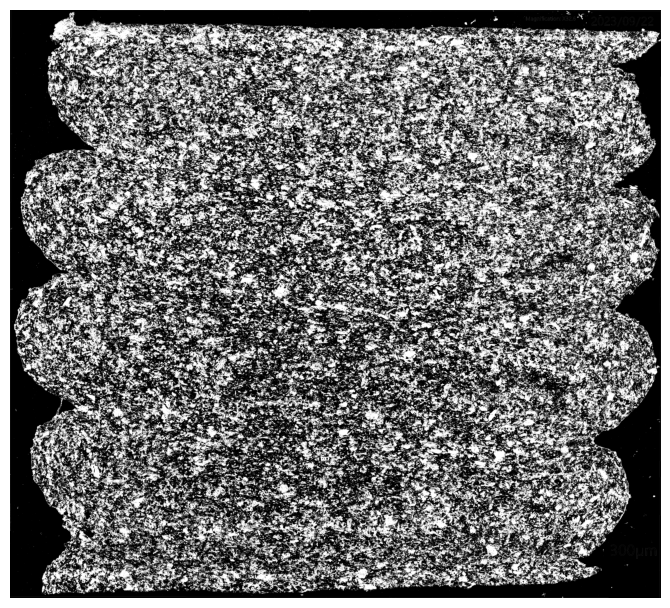

In [21]:
img_gray = sitk.GetImageFromArray(img_gray)
img_gray = sitk.Cast(img_gray,sitk.sitkFloat32 )
img_gray= sitk.RescaleIntensity(img_gray, 0, 255)

#Applies a binary threshold to the sample
binary_image = sitk.BinaryThreshold(img_gray, lowerThreshold=160, upperThreshold=255, insideValue=0, outsideValue=255)

#Detects extreme black pixels in original image from text
binary_mask = sitk.BinaryThreshold(img_gray, lowerThreshold=0, upperThreshold=20, insideValue=0, outsideValue=255)

#Masks binary image to disregard black text from label
mask_filter = sitk.MaskImageFilter()
binary_image = mask_filter.Execute(binary_image, binary_mask)

utils.print_image(sitk.GetArrayViewFromImage(binary_image))

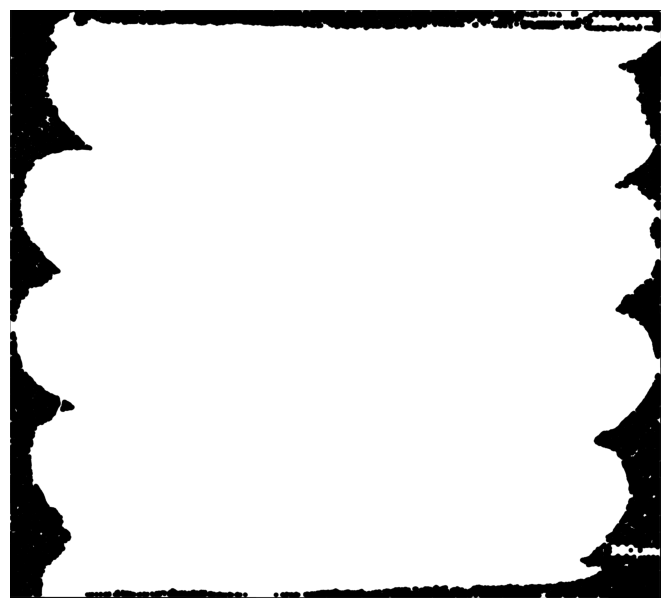

In [22]:
close_filter = sitk.BinaryMorphologicalClosingImageFilter()
close_filter.SetKernelRadius([45, 45])
close_filter.SetForegroundValue(255)

closed_image = close_filter.Execute(binary_image)

utils.print_image(sitk.GetArrayViewFromImage(closed_image))

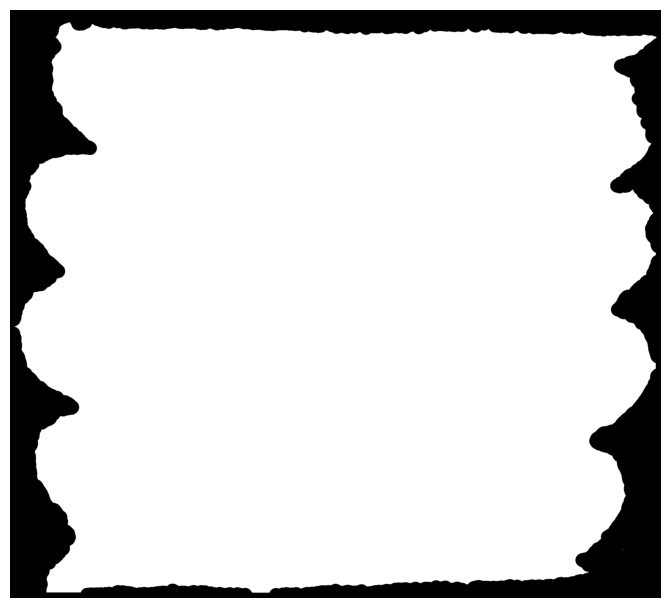

In [23]:
erode_filter = sitk.BinaryErodeImageFilter()
erode_filter.SetKernelRadius([90, 90])
erode_filter.SetForegroundValue(255)

eroded_image = erode_filter.Execute(closed_image)

utils.print_image(sitk.GetArrayViewFromImage(eroded_image))

In [24]:
color_image = img_color
color_image = sitk.GetImageFromArray(color_image)

mask_image = eroded_image

binary_mask = sitk.BinaryThreshold(mask_image, lowerThreshold=1, upperThreshold=255, insideValue=1, outsideValue=0)

mask_filter = sitk.MaskImageFilter()
mask_filter.SetMaskingValue(0)
masked_color_image = mask_filter.Execute(color_image, binary_mask)

plt.figure(figsize=(6, 6))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(masked_color_image))
plt.axis('on');

# binary_mask = sitk.BinaryThreshold(eroded_image, lowerThreshold=1, upperThreshold=255, insideValue=1, outsideValue=0)

# mask_filter = sitk.MaskImageFilter()
# mask_filter.SetMaskingValue(0)
# masked_color_image = mask_filter.Execute(img_color, binary_mask)

# plt.figure(figsize=(6, 6))
# plt.style.use('_mpl-gallery-nogrid')
# plt.imshow(sitk.GetArrayViewFromImage(masked_color_image))
# plt.axis('on');

RuntimeError: Exception thrown in SimpleITK MaskImageFilter_Execute: /tmp/SimpleITK/Code/BasicFilters/src/sitkImageFilter.cxx:38:
sitk::ERROR: Input "maskImage" for "MaskImageFilter" has dimension of 2 which does not match the primary input's dimension of 3!